In [1]:
# Import the pandas library, which is essential for data manipulation and analysis in Python.
# We give it the conventional alias 'pd'.
import pandas as pd

# Define the filename as a variable. This makes the code cleaner and easier to update.
file_name = 'Global_Cybersecurity_Threats_2015-2024.csv'

# Use a try-except block to handle potential errors gracefully, like the file not being found.
try:
    # Use the read_csv function from pandas to load the data from the CSV file.
    # The data is loaded into a structure called a DataFrame, which we store in the 'df' variable.
    df = pd.read_csv(file_name)
    
    # --- Initial Data Exploration ---
    # Task successful! Now let's perform the exploration steps we discussed.
    
    # 1. Display the first 5 rows of the DataFrame to get a quick look at the data structure and values.
    print("--- 1. First 5 Rows of the Data (df.head()) ---")
    print(df.head())
    
    # 2. Display a concise summary of the DataFrame.
    # This includes the number of entries, column names, non-null counts, and data types (Dtype).
    print("\n--- 2. Dataframe Information (df.info()) ---")
    df.info()

    # 3. Display a clean list of all column names.
    print("\n--- 3. Column Names (df.columns) ---")
    print(df.columns.tolist()) # .tolist() formats the output as a clean list.

except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please check the following:")
    print("1. The filename is spelled exactly correctly (it is case-sensitive and needs the .csv extension).")
    print("2. The CSV file is in the same folder as this Jupyter Notebook.")
except Exception as e:
    print(f"An unexpected error occurred while reading the file: {e}")

--- 1. First 5 Rows of the Data (df.head()) ---
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Softwar

In [2]:
# Make a copy of the original dataframe to work on, which is a good practice.
df_cleaned = df.copy()

# --- 1. Standardize Column Names ---

# Create a new list of cleaned column names
new_columns = []
for col in df_cleaned.columns:
    # Convert to lowercase
    new_col = col.lower()
    # Replace spaces and hyphens with underscores
    new_col = new_col.replace(' ', '_').replace('-', '_')
    # Remove special characters like parentheses and dollar signs
    new_col = new_col.replace('(', '').replace(')', '').replace('$', '')
    new_columns.append(new_col)

# Assign the new, cleaned column names to the dataframe
df_cleaned.columns = new_columns

print("--- 1. Cleaned Column Names ---")
print(df_cleaned.columns.tolist())
print("\n--- First 5 rows with new column names ---")
print(df_cleaned.head())


# --- 2. Check for Consistency in Categorical Data ---

# Now that we have cleaned column names, we can easily access them.
# Let's check the unique values and their counts for our target columns.
# This helps us understand the distribution and spot any inconsistencies.

print("\n\n--- 2. Unique Values in 'attack_type' ---")
print(df_cleaned['attack_type'].value_counts())

print("\n\n--- 3. Unique Values in 'security_vulnerability_type' ---")
print(df_cleaned['security_vulnerability_type'].value_counts())

--- 1. Cleaned Column Names ---
['country', 'year', 'attack_type', 'target_industry', 'financial_loss_in_million_', 'number_of_affected_users', 'attack_source', 'security_vulnerability_type', 'defense_mechanism_used', 'incident_resolution_time_in_hours']

--- First 5 rows with new column names ---
   country  year        attack_type     target_industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   financial_loss_in_million_  number_of_affected_users attack_source  \
0                       80.53                    773169  Hacker Group   
1                       62.19                    295961  Hacker Group   
2                       38.65                    605895  Hacker Group   
3                       41.44                    65932

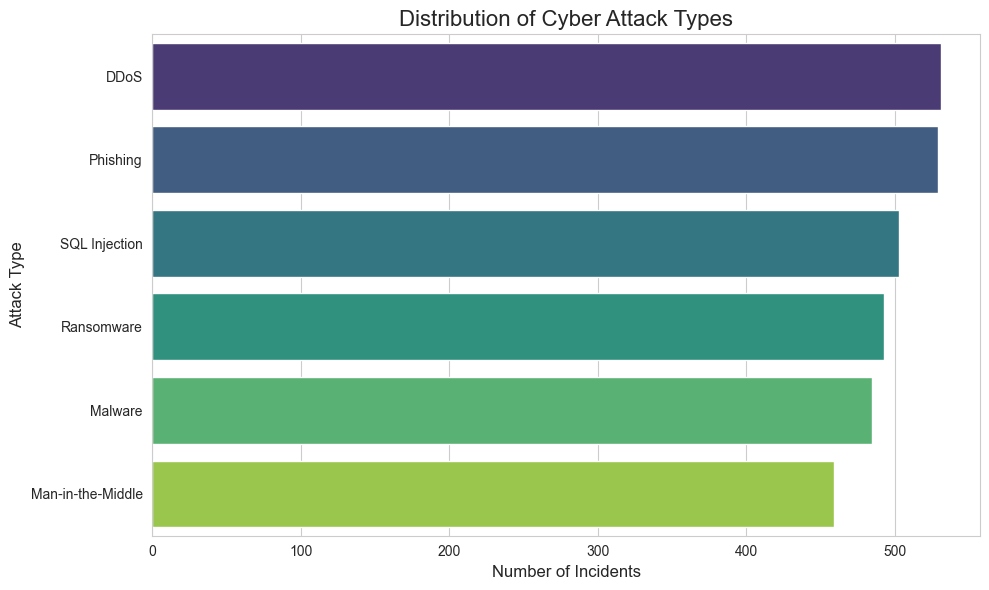

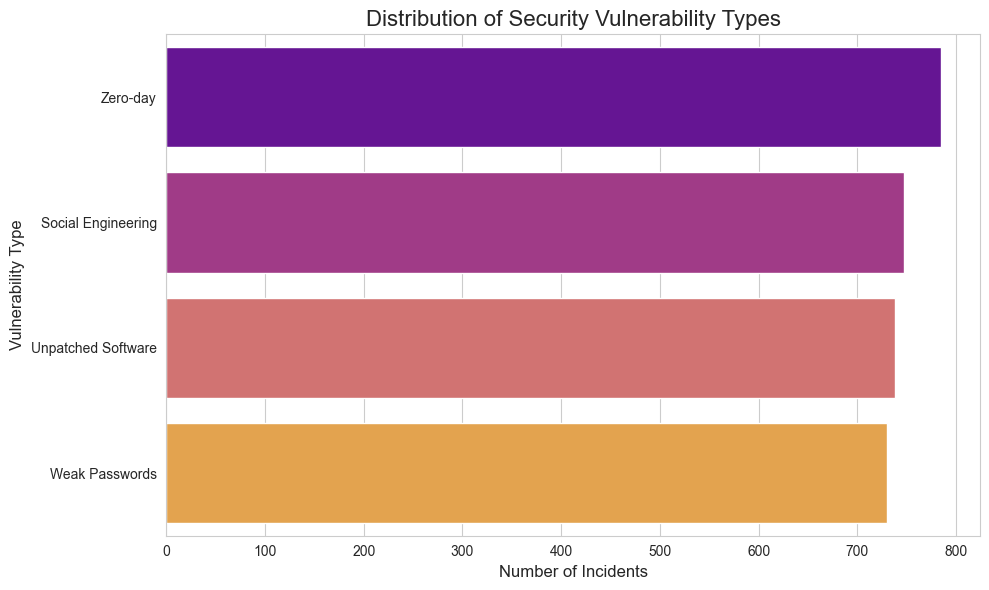

In [5]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")


# --- 1. Plot for Attack Type Distribution (Updated Code) ---
plt.figure(figsize=(10, 6))
attack_order = df_cleaned['attack_type'].value_counts().index

# The following line is updated according to the warning
# We add `hue='attack_type'` and `legend=False`
sns.countplot(y='attack_type', data=df_cleaned, order=attack_order, 
              hue='attack_type', palette='viridis', legend=False)

plt.title('Distribution of Cyber Attack Types', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show() # Display the plot


# --- 2. Plot for Security Vulnerability Distribution (Updated Code) ---
plt.figure(figsize=(10, 6))
vulnerability_order = df_cleaned['security_vulnerability_type'].value_counts().index

# The following line is updated according to the warning
# We add `hue='security_vulnerability_type'` and `legend=False`
sns.countplot(y='security_vulnerability_type', data=df_cleaned, order=vulnerability_order, 
              hue='security_vulnerability_type', palette='plasma', legend=False)

plt.title('Distribution of Security Vulnerability Types', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Vulnerability Type', fontsize=12)
plt.tight_layout() # Adjust plot
plt.show() # Display the plot

--- Ensuring column names are clean before plotting ---
Columns we are using for the plots:
['country', 'year', 'attack_type', 'target_industry', 'financial_loss_in_million_', 'number_of_affected_users', 'attack_source', 'security_vulnerability_type', 'defense_mechanism_used', 'incident_resolution_time_in_hours']
--------------------------------------------------

--- Analyzing Top Attacked Industries ---


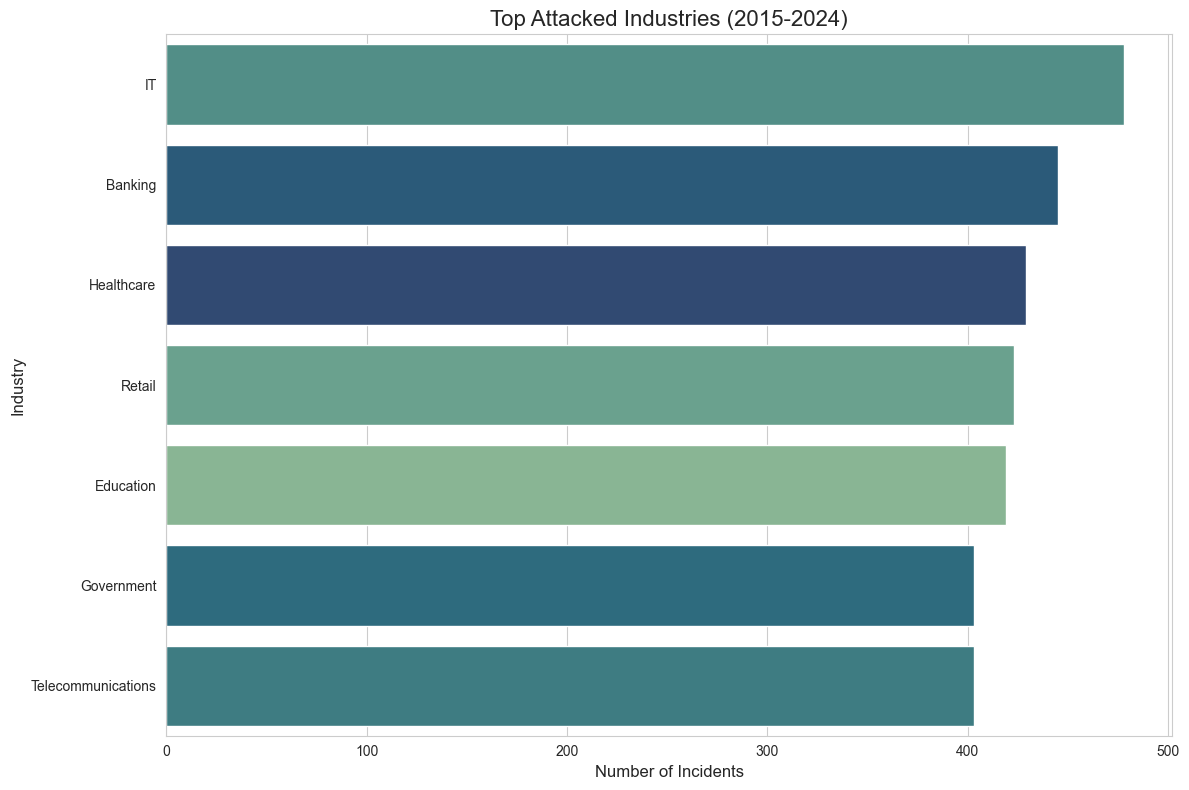


--- Analyzing Severity of Different Attack Types ---

Average Severity per Attack Type:
                   financial_loss_in_million_  number_of_affected_users
attack_type                                                            
DDoS                                52.035631             499437.410546
Man-in-the-Middle                   51.309085             520064.320261
Phishing                            50.459905             487179.536862
SQL Injection                       50.013042             512469.833002
Ransomware                          49.653793             502825.369168
Malware                             49.418454             508780.232990


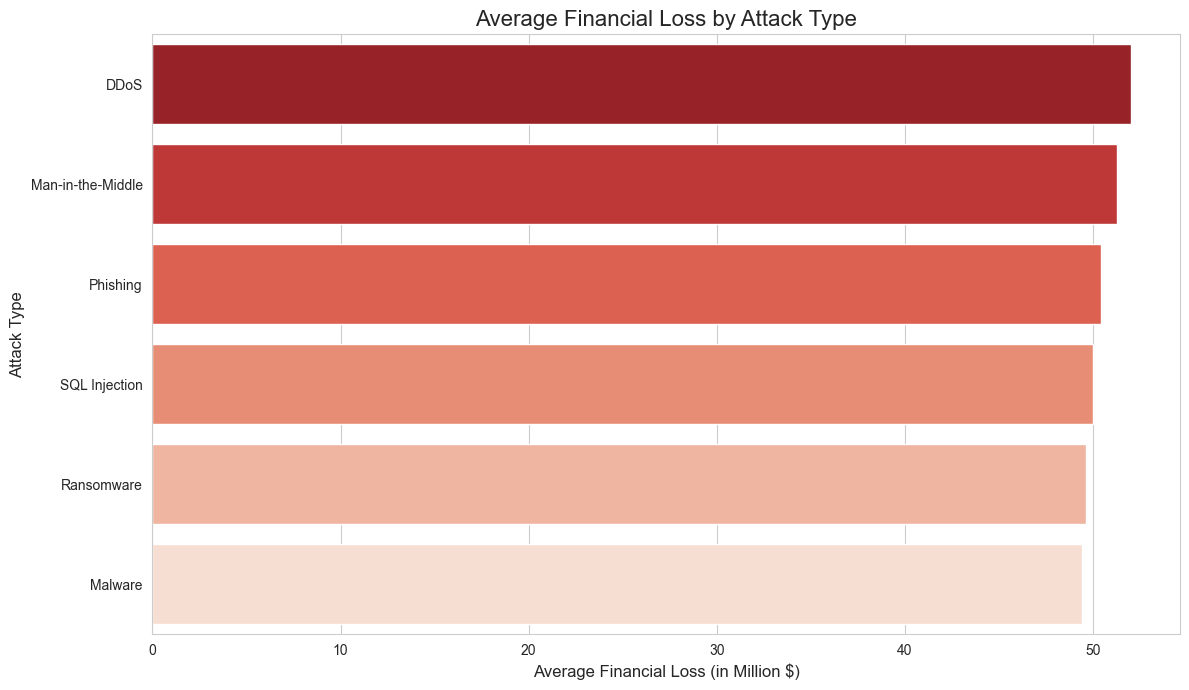

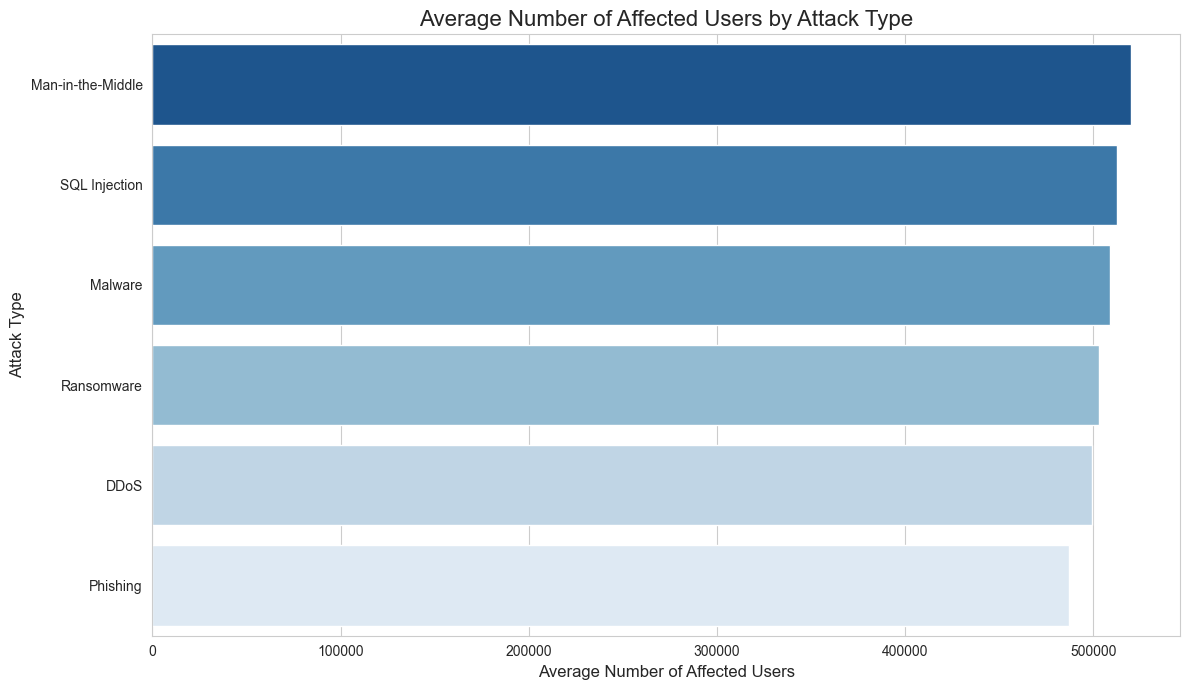

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Re-apply the cleaning logic to ensure data is correct ---
# This makes sure that no matter what happened before, 
# we are using a dataframe with cleaned column names.
# We assume the original dataframe 'df' is still available in memory.

print("--- Ensuring column names are clean before plotting ---")
df_cleaned = df.copy() # Start fresh from the original dataframe 'df'

# Create a list of new, clean column names
new_columns = []
for col in df_cleaned.columns:
    new_col = col.lower()
    new_col = new_col.replace(' ', '_').replace('-', '_')
    new_col = new_col.replace('(', '').replace(')', '').replace('$', '')
    new_columns.append(new_col)

# Assign the new, cleaned column names to the dataframe
df_cleaned.columns = new_columns

# Let's print the final column names we are about to use, just to be 100% sure.
print("Columns we are using for the plots:")
print(df_cleaned.columns.tolist())
print("-" * 50)


# --- Step 2: Perform the Analysis and Visualization ---
# Now we can be confident that the column names are correct.

# --- 2a. Analysis of Top Attacked Industries ---

print("\n--- Analyzing Top Attacked Industries ---")
plt.figure(figsize=(12, 8)) 

industry_order = df_cleaned['target_industry'].value_counts().index

sns.countplot(y='target_industry', data=df_cleaned, order=industry_order,
              hue='target_industry', palette='crest', legend=False)

plt.title('Top Attacked Industries (2015-2024)', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.tight_layout()
plt.show()


# --- 2b. Analysis of Attack Severity ---

print("\n--- Analyzing Severity of Different Attack Types ---")

attack_severity = df_cleaned.groupby('attack_type')[[
    'financial_loss_in_million_', 
    'number_of_affected_users'
]].mean().sort_values(by='financial_loss_in_million_', ascending=False)

print("\nAverage Severity per Attack Type:")
print(attack_severity)


# --- Plotting the Severity Analysis ---

# Plot for Average Financial Loss
plt.figure(figsize=(12, 7))
sns.barplot(x=attack_severity['financial_loss_in_million_'], y=attack_severity.index, 
            hue=attack_severity.index, palette='Reds_r', legend=False)
plt.title('Average Financial Loss by Attack Type', fontsize=16)
plt.xlabel('Average Financial Loss (in Million $)', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.tight_layout()
plt.show()

# Plot for Average Affected Users
attack_severity_by_users = attack_severity.sort_values(by='number_of_affected_users', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=attack_severity_by_users['number_of_affected_users'], y=attack_severity_by_users.index,
            hue=attack_severity_by_users.index, palette='Blues_r', legend=False)
plt.title('Average Number of Affected Users by Attack Type', fontsize=16)
plt.xlabel('Average Number of Affected Users', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.tight_layout()
plt.show()

--- 1. Analyzing Trend of Attack Types Over Years ---

Number of Incidents per Attack Type per Year:
attack_type  DDoS  Malware  Man-in-the-Middle  Phishing  Ransomware  \
year                                                                  
2015           50       51                 41        46          47   
2016           53       41                 47        55          42   
2017           58       46                 58        64          44   
2018           60       56                 36        52          49   
2019           48       43                 44        45          38   
2020           56       37                 47        61          59   
2021           47       49                 48        41          55   
2022           54       64                 41        57          56   
2023           51       55                 50        46          50   
2024           54       43                 47        62          53   

attack_type  SQL Injection  
year             

<Figure size 1400x800 with 0 Axes>

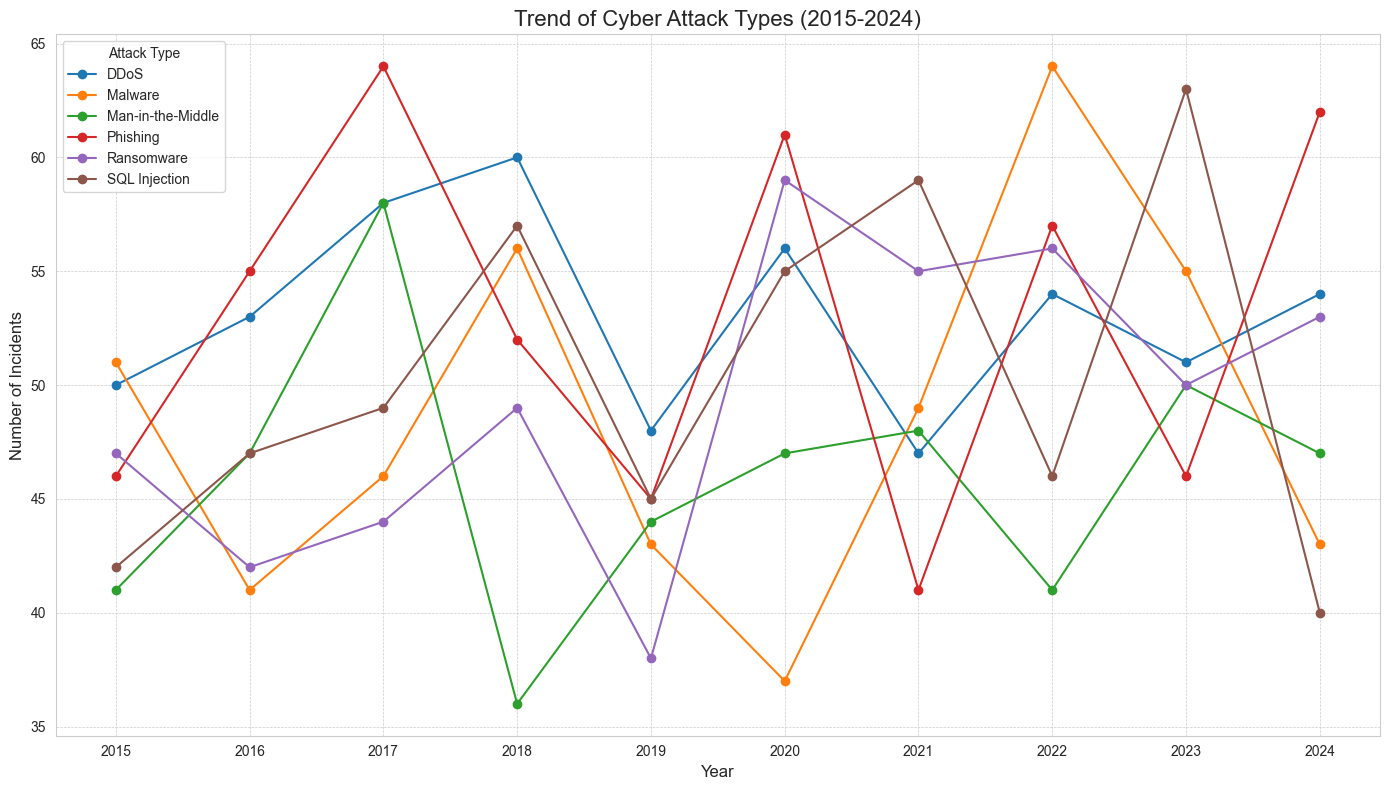


--- 2. Analyzing Trend of Financial Loss Over Years ---

Total Financial Loss per Year (in Million $):
year
2015    14510.21
2016    13947.26
2017    16261.68
2018    14720.48
2019    13134.69
2020    15767.95
2021    15873.41
2022    15870.86
2023    15958.08
2024    15434.29
Name: financial_loss_in_million_, dtype: float64


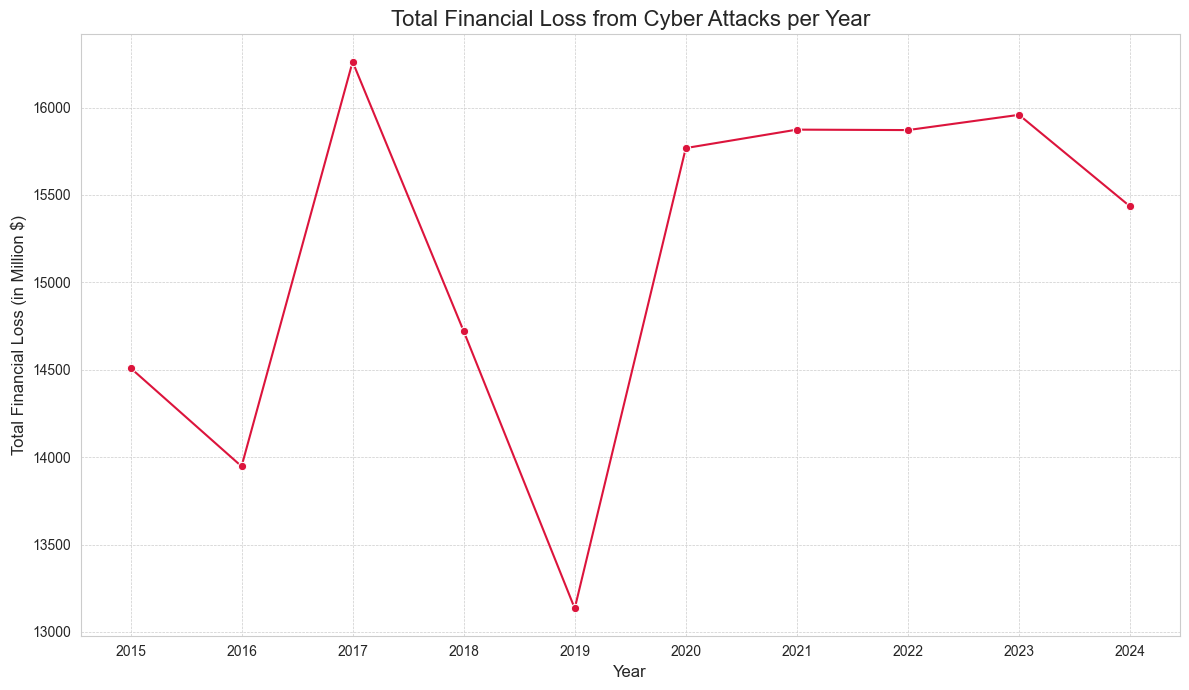

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style for the plots
sns.set_style("whitegrid")


# --- 1. Trend Analysis of Attack Types Over Years ---
print("--- 1. Analyzing Trend of Attack Types Over Years ---")

# To see the trend, we need to count each attack type for each year.
# We can group by both 'year' and 'attack_type' and then count the occurrences.
# .unstack() is a function that pivots the 'attack_type' from rows to columns, which is perfect for plotting.
attack_trends = df_cleaned.groupby(['year', 'attack_type']).size().unstack(fill_value=0)

print("\nNumber of Incidents per Attack Type per Year:")
print(attack_trends)

# Plotting the trends using a line plot
plt.figure(figsize=(14, 8))
# Plot a line for each column (each attack type) in the attack_trends dataframe
attack_trends.plot(kind='line', marker='o', figsize=(14, 8))

plt.title('Trend of Cyber Attack Types (2015-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(attack_trends.index) # Ensure all years are shown on the x-axis
plt.legend(title='Attack Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


# --- 2. Trend Analysis of Financial Loss Over Years ---
print("\n--- 2. Analyzing Trend of Financial Loss Over Years ---")

# To see the financial trend, we group by 'year' and calculate the SUM of losses for each year.
financial_trends = df_cleaned.groupby('year')['financial_loss_in_million_'].sum()

print("\nTotal Financial Loss per Year (in Million $):")
print(financial_trends)

# Plotting the financial trend
plt.figure(figsize=(12, 7))
sns.lineplot(x=financial_trends.index, y=financial_trends.values, marker='o', color='crimson')

plt.title('Total Financial Loss from Cyber Attacks per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Financial Loss (in Million $)', fontsize=12)
plt.xticks(financial_trends.index) # Ensure all years are shown
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [10]:
# Import the necessary function from scikit-learn for splitting data
from sklearn.model_selection import train_test_split

print("--- Preparing Data for Machine Learning ---")

# --- 1. Feature Engineering: One-Hot Encoding ---

# Select the categorical columns that we will use as features
# We exclude 'country' for now to keep the model simpler, but it could be added back later.
categorical_features = ['target_industry', 'attack_source', 'security_vulnerability_type', 'defense_mechanism_used']

# Use pandas' get_dummies function to perform one-hot encoding
df_ml = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)

# 'drop_first=True' helps to reduce multicollinearity by removing the first category of each feature.

# Also, let's include our numerical features
numerical_features = ['year', 'financial_loss_in_million_', 'number_of_affected_users', 'incident_resolution_time_in_hours']

# Our final feature set will be the one-hot encoded columns plus the numerical columns
features_to_use = df_ml.columns.drop('attack_type') # Use all columns except our target

# --- 2. Define Features (X) and Target (y) ---

# X contains all the features we will use to make a prediction.
X = df_ml[features_to_use]

# y is the target variable that we want to predict.
y = df_ml['attack_type']


# Let's look at the transformed data
print("\n--- Shape of our new feature matrix (X) ---")
print(X.shape)

print("\n--- First 5 rows of the feature matrix (X) ---")
print(X.head())

print("\n--- Our target variable (y) ---")
print(y.head())

print("\nData is now ready for modeling!")

--- Preparing Data for Machine Learning ---

--- Shape of our new feature matrix (X) ---
(3000, 21)

--- First 5 rows of the feature matrix (X) ---
   country  year  financial_loss_in_million_  number_of_affected_users  \
0    China  2019                       80.53                    773169   
1    China  2019                       62.19                    295961   
2    India  2017                       38.65                    605895   
3       UK  2024                       41.44                    659320   
4  Germany  2018                       74.41                    810682   

   incident_resolution_time_in_hours  target_industry_Education  \
0                                 63                       True   
1                                 71                      False   
2                                 20                      False   
3                                  7                      False   
4                                 68                      False   

   t

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("--- Step 1: Preparing Data for Machine Learning (Corrected) ---")

# --- Feature Engineering: One-Hot Encoding (Now including 'country') ---

# The list of categorical columns now INCLUDES 'country'.
categorical_features = ['country', 'target_industry', 'attack_source', 'security_vulnerability_type', 'defense_mechanism_used']

# Use pandas' get_dummies to perform one-hot encoding on all specified categorical columns.
df_ml = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)


# --- Define Features (X) and Target (y) ---

# X contains all columns EXCEPT our target variable 'attack_type'.
# This ensures X is purely numerical.
X = df_ml.drop(columns=['attack_type'])

# y is the target variable that we want to predict.
y = df_ml['attack_type']

print("Feature matrix (X) and target vector (y) are now correctly prepared.")
print(f"Shape of the final feature matrix X: {X.shape}")


# --- Step 2: Split the Data into Training and Testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# --- Step 3: Initialize and Train the Random Forest Model ---
print("\n--- Training the Random Forest model... ---")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Model training complete!")


# --- Step 4: Make Predictions and Evaluate the Model ---
print("\n--- Making predictions on the test data... ---")
y_pred = rf_model.predict(X_test)

print("\n--- Evaluating Model Performance ---")

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy:.2%})")

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

--- Step 1: Preparing Data for Machine Learning (Corrected) ---
Feature matrix (X) and target vector (y) are now correctly prepared.
Shape of the final feature matrix X: (3000, 29)

Training data shape: (2400, 29)
Testing data shape: (600, 29)

--- Training the Random Forest model... ---
Model training complete!

--- Making predictions on the test data... ---

--- Evaluating Model Performance ---
Model Accuracy: 0.1717 (17.17%)

--- Detailed Classification Report ---
                   precision    recall  f1-score   support

             DDoS       0.16      0.18      0.17       111
          Malware       0.19      0.18      0.18        97
Man-in-the-Middle       0.22      0.17      0.19        99
         Phishing       0.15      0.19      0.17       103
       Ransomware       0.18      0.25      0.21        79
    SQL Injection       0.15      0.08      0.10       111

         accuracy                           0.17       600
        macro avg       0.17      0.18      0.17      